In [1]:
import pandas as pd
import numpy as np
from lsynth import compute_upsilon, generate_syndata
import seaborn as sns

#MODEL='./modelHRS72p05.gz'
#DATA="./HRSvar72.csv"
DATA='../datasets/gss_2018.csv'
model_path="../datasets/gss_2018.joblib"
orig_df=pd.read_csv(DATA,keep_default_na=False)

# Generate synthetic data 

In [4]:
# 1. Generate synthetic data with a chosen generator
df_lsm = generate_syndata(
    num=100,
    model_path=model_path,
    gen_algorithm="LSM",
    n_workers=11,
)

Loading model from ../datasets/gss_2018.joblib ...
Generating 100 rows via LSM (qsample).


qsample(LSM, threads=11): 100%|███████████████| 100/100 [01:06<00:00,  1.51it/s]


In [2]:
# 1. Generate synthetic data with a chosen generator
df_baseline = generate_syndata(
    num=100,
    gen_algorithm="BASELINE",
    orig_df=orig_df,
    n_workers=11,
)

Generating 100 rows via BASELINE (independent columns).


In [3]:
# 1. Generate synthetic data with a chosen generator
df_ctgan = generate_syndata(
    num=100,
    gen_algorithm="CTGAN",
    orig_df=orig_df.sample(50),
    n_workers=11,
)

Generating 100 rows via CTGAN.


# Compute Upsilon on that synthetic dataframes

Loading model from ../datasets/gss_2018.joblib ...
Computing Upsilon on DataFrame with 100 rows ...


average_fidelity(threads=11): 100%|███████████| 100/100 [00:30<00:00,  3.29it/s]


0.797480773656705


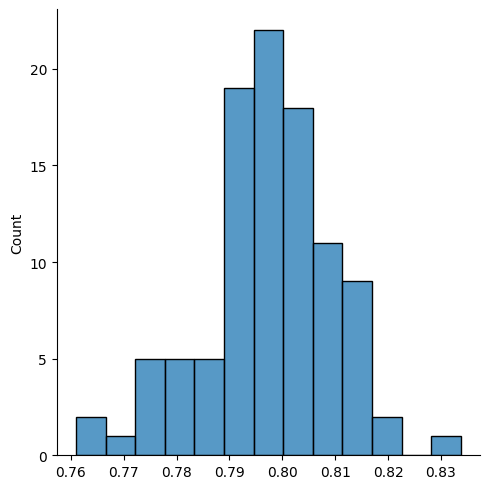

In [5]:
ups_lsm, _ = compute_upsilon(
    df_lsm,
    model_path=model_path,
    n_workers=11,
)
print(np.nanmean(ups_lsm))
sns.displot(ups_lsm)

Loading model from ../datasets/gss_2018.joblib ...
Computing Upsilon on DataFrame with 100 rows ...


average_fidelity(threads=11): 100%|███████████| 100/100 [00:31<00:00,  3.17it/s]

0.7473138599605658


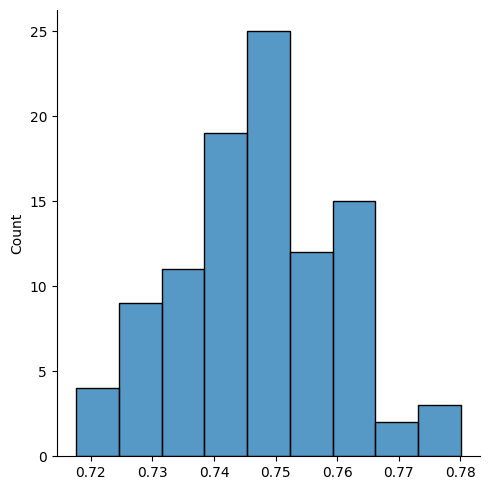

In [6]:
ups_baseline, _ = compute_upsilon(
    df_baseline,
    model_path=model_path,
    n_workers=11,
)
print(np.nanmean(ups_baseline))
sns.displot(ups_baseline)

Loading model from ../datasets/gss_2018.joblib ...
Computing Upsilon on DataFrame with 100 rows ...


average_fidelity(threads=11): 100%|███████████| 100/100 [00:31<00:00,  3.21it/s]


0.7473138599605658


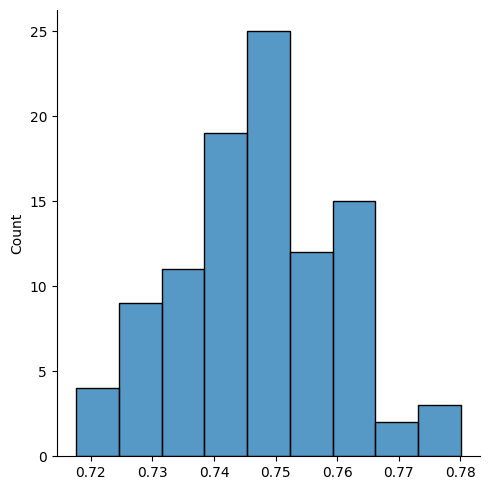

In [7]:
ups_ctgan, _ = compute_upsilon(
    df_baseline,
    model_path=model_path,
    n_workers=11,
)
print(np.nanmean(ups_ctgan))
sns.displot(ups_ctgan)